# Pittsburgh's Best Neighborhood

## Group Members: Chris Trostel, Charlotte Oberti, Nick Cheddar

## Group Name: Pittsburgh Think Tank

#### Metrics: Public Art, Libraries and Parks

#### Data Sets: 
* libraries.csv
* Public-Art.csv
* CityParks.csv


# Libraries

# Public Art

#### Below is the original data set that has each piece of public art and describes in what neighborhood that piece of art lives in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("Public-Art.csv", )
data

,_id,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,2,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,3,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,4,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,5,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,1089921133,WM00099000,17th Ward Veterans Memorial,NaN,Non-City Owned,NaN,NaN,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.428635,-79.980443
195,196,191395610,WM00101000,Saint Josephat Honor Roll,NaN,Non-City Owned,NaN,NaN,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-22,40.423129,-79.973486
196,197,628976107,WM00102000,World War II Momument,NaN,Non-City Owned,NaN,NaN,Spring Garden,1.0,26.0,4.200324e+10,1.0,26.0,1.0,1-11,40.471780,-79.986670
197,198,1309894649,WM00105000,Korean War Veterans Memorial,R. Allan Christianson (Architect),War Memorials,Northshore Riverfront Park,NaN,North Shore,1.0,22.0,4.200398e+10,6.0,22.0,1.0,1-7,40.445726,-80.008082


#### Below is a more simplified version of the graph counting how many pieces of art are in one neighborhood then ranking it from greatest to least.

In [2]:
neighborhood_counts = data['neighborhood'].value_counts()

print("Counts of each neighborhood value:")
print(neighborhood_counts)

Counts of each neighborhood value:
Central Business District    27
Squirrel Hill South          20
Allegheny Center             18
Highland Park                10
South Side Flats              9
North Shore                   8
Beechview                     7
Shadyside                     6
Central Oakland               5
Lower Lawrenceville           5
Brighton Heights              5
Spring Hill-City View         4
Crawford-Roberts              3
Greenfield                    3
Elliott                       3
Beltzhoover                   3
Hazelwood                     3
South Side Slopes             3
Duquesne Heights              3
Point Breeze                  3
Garfield                      2
Upper Hill                    2
Central Lawrenceville         2
Spring Garden                 2
Mount Washington              2
Allentown                     2
Strip District                2
Lincoln-Lemington-Belmar      2
Squirrel Hill North           2
East Allegheny                2
West 

#### Below is the date above but in graph form, allowing us to see the drastic difference in the neighborhoods.

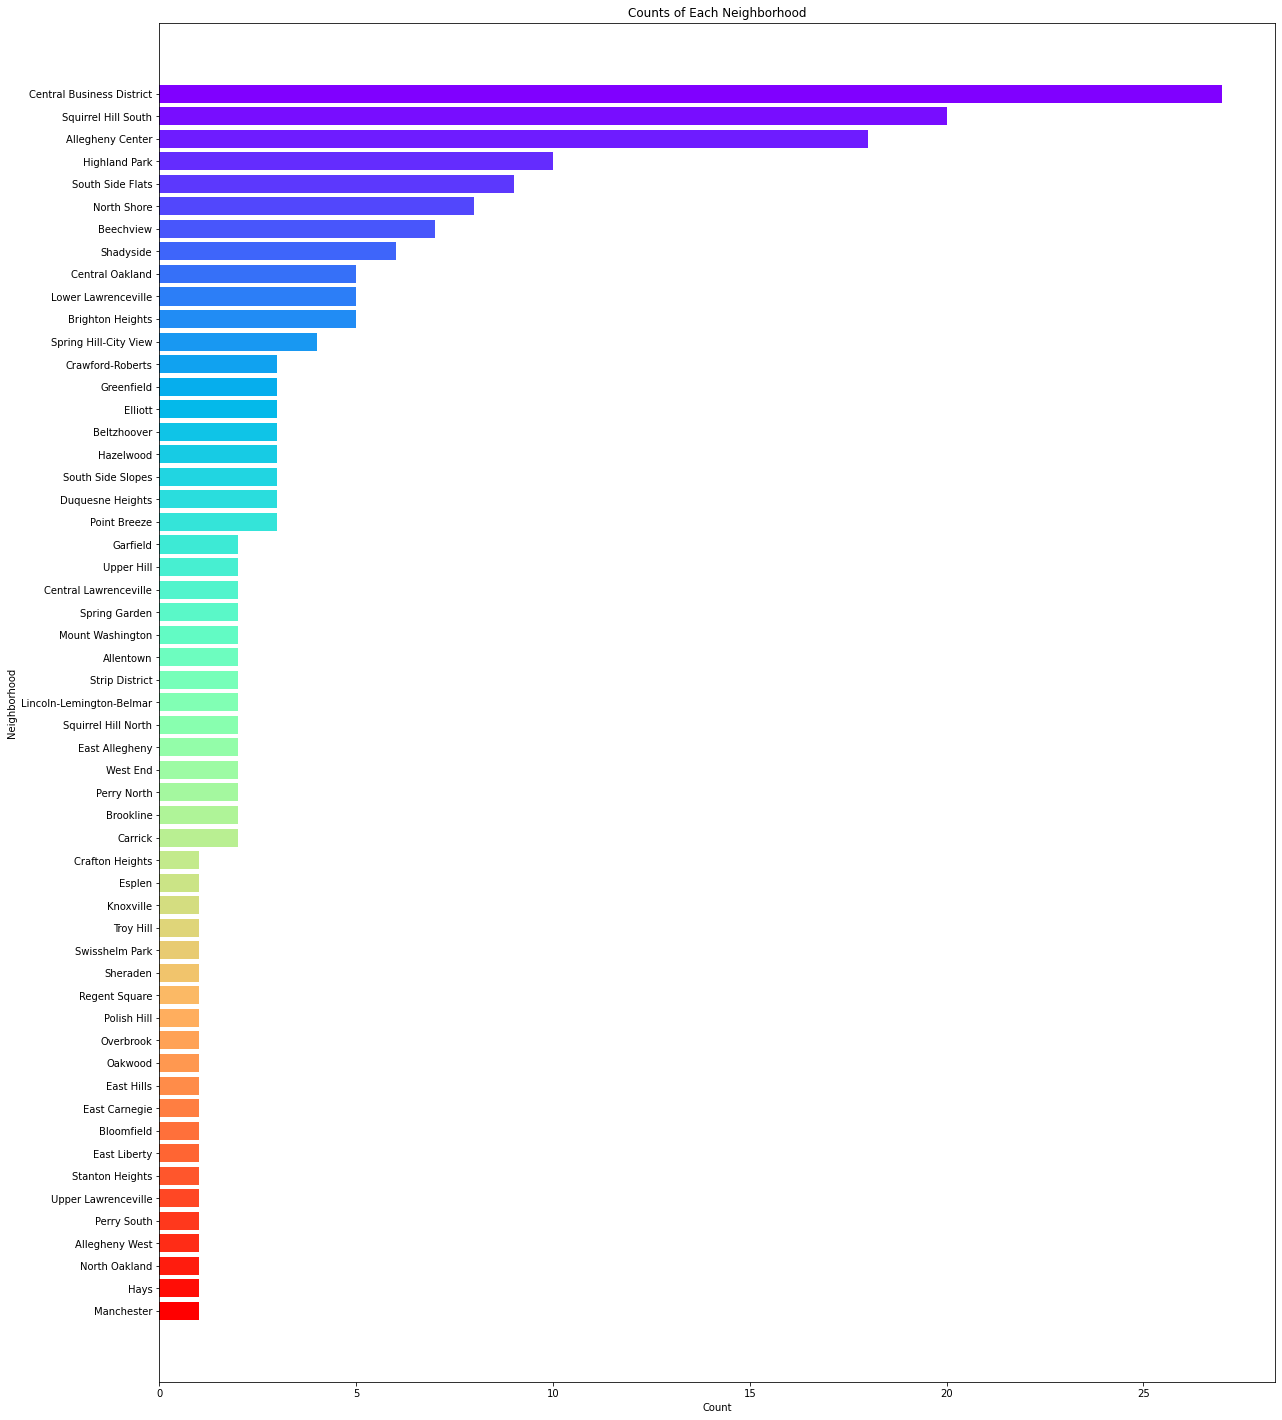

In [4]:
neighborhood_counts_df = neighborhood_counts.reset_index()
neighborhood_counts_df.columns = ['neighborhood', 'count']

num_bars = len(neighborhood_counts_df)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

plt.figure(figsize=(20, 25))
plt.barh(neighborhood_counts_df['neighborhood'], neighborhood_counts_df['count'], color=colors)
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('Counts of Each Neighborhood')
plt.gca().invert_yaxis()
plt.show()

### Conclusion

Based on the graph and data I have collected it is safe to assume that the top three neighborhoods in pittsburgh are the Central Business District, Squirrell Hill South, and Allegheny Center and the the best neighborhood overall has to be one of these.

# Parks